In [1010]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [1011]:
dataset = pd.read_csv("laptop_data.csv")

In [1012]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1013]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1014]:
dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1015]:
dataset.duplicated().sum()

0

In [1016]:
dataset.drop(columns=["Unnamed: 0"],inplace=True)

In [1017]:
dataset["Ram"]=dataset.Ram.str.replace("GB","").astype("int32")



In [1018]:
dataset.Weight.unique()
dataset["Weight"]=dataset.Weight.str.replace("kg","").astype("float32")


In [1019]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


 ## Screen_Resolution1

In [1020]:
dataset['Touchscreen'] = dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
dataset['IPS']=dataset.ScreenResolution.apply(lambda x: 1 if 'IPS Panel' in x else 0)
dataset["Full HD"] = dataset.ScreenResolution.apply(lambda x: 1 if "Full HD" in x else 0)
dataset["Quad HD+"] = dataset.ScreenResolution.apply(lambda x: 1 if "Quad" in x else 0)
dataset["4K Ultra HD"] = dataset.ScreenResolution.apply(lambda x: 1 if "4K Ultra HD" in x else 0)
dataset["Retina Display"] = dataset.ScreenResolution.apply(lambda x: 1 if "Retina Display" in x else 0)

In [1021]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,Retina Display
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,1


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

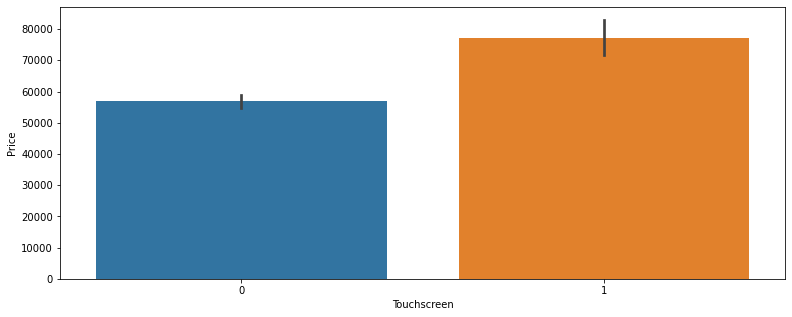

In [1022]:
sns.barplot(x=dataset["Touchscreen"], y=dataset["Price"])


<AxesSubplot:xlabel='IPS', ylabel='Price'>

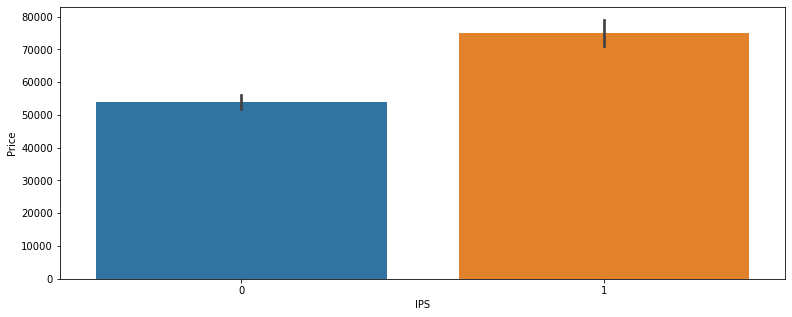

In [1023]:
sns.barplot(x=dataset["IPS"], y=dataset["Price"])

<AxesSubplot:xlabel='4K Ultra HD', ylabel='Price'>

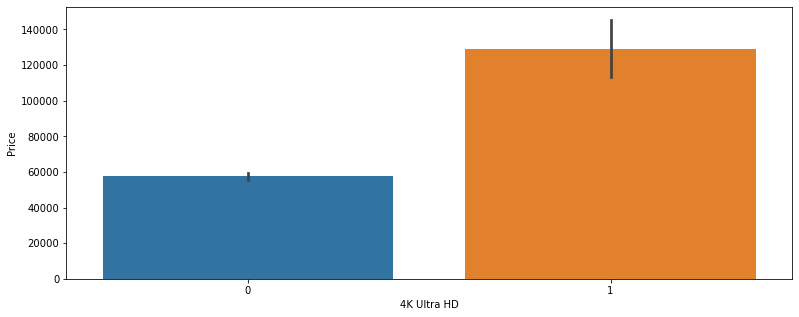

In [1024]:
sns.barplot(x=dataset["4K Ultra HD"], y= dataset["Price"])


<AxesSubplot:xlabel='Retina Display', ylabel='Price'>

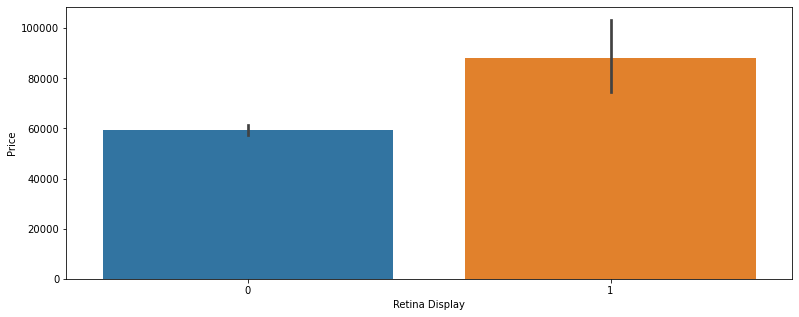

In [1025]:
sns.barplot(x=dataset["Retina Display"], y= dataset["Price"])

<AxesSubplot:xlabel='Quad HD+', ylabel='Price'>

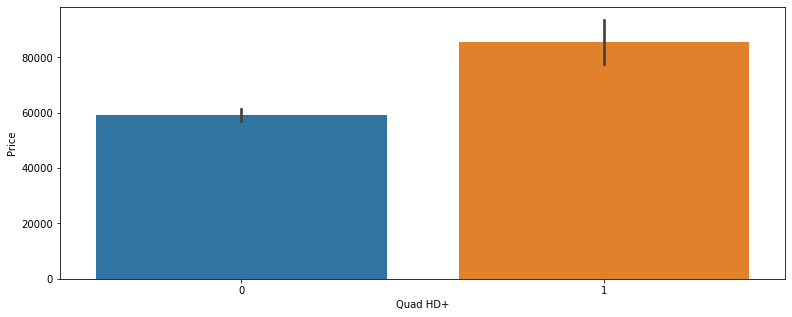

In [1026]:
sns.barplot(x=dataset["Quad HD+"], y= dataset["Price"])

<AxesSubplot:xlabel='Full HD', ylabel='Price'>

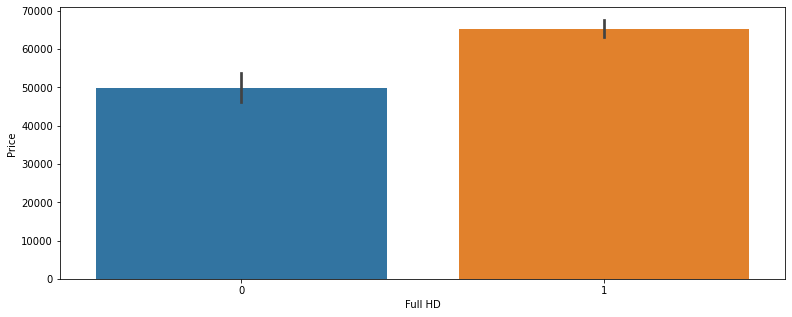

In [1027]:
sns.barplot(x=dataset["Full HD"], y= dataset["Price"])


## Screen_Resolution2

In [1028]:
dataset.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [1029]:
new = dataset.ScreenResolution.str.split("x")
dataset["X"] = new.apply(lambda x: x[-2][-4:]).astype("int32")
dataset["Y"] = new.apply(lambda x: x[-1]).astype("int32")
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,Retina Display,X,Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,1,2560,1600


In [1030]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Full HD           1303 non-null   int64  
 14  Quad HD+          1303 non-null   int64  
 15  4K Ultra HD       1303 non-null   int64  
 16  Retina Display    1303 non-null   int64  


In [1031]:
dataset["ppi"]=(((dataset["X"]**2)+(dataset["Y"]**2))**0.5)/dataset["Inches"]

In [1032]:
dataset.drop(columns=["ScreenResolution","X","Y", "Inches"], inplace = True)

In [1033]:
dataset["ppi"]

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: ppi, Length: 1303, dtype: float64

## Memory Column 

In [1034]:
dataset.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [1035]:
def splitter(a):
    if ".0" in a:
        a=a.replace(".0","")
    if "SSD" in a:
        b=a.split()[0]
        if "GB" in b:
            c = (int)("".join(filter(str.isdigit, b)))
            return (c)
        else:
            return ((int)("".join(filter(str.isdigit,b))) * 1024)
    elif "HDD" in a:
        b=a.split()[0]
        if "GB" in b:
            c = (int)("".join(filter(str.isdigit, b)))
            return c
        else:
            return (int)("".join(filter(str.isdigit,b))) * 1024
    elif "Hybrid" in a:
        b=a.split()[0]
        if "GB" in b:
            c = (int)("".join(filter(str.isdigit, b)))
            return c
        else:
            return (int)("".join(filter(str.isdigit,b))) * 1024
    elif "Flash Storage" in a:
        b=a.split()[0]
        if "GB" in b:
            c = (int)("".join(filter(str.isdigit, b)))
            return c
        else:
            return (int)("".join(filter(str.isdigit,b))) * 1024




In [1036]:
dump=dataset.copy()

In [1037]:
dump["M"] = dump["Memory"].apply(lambda x: "" if "+" in x else x)
dump["M+"] = dump["Memory"].apply(lambda x: x if "+" in x else "")
dump["SSD STR"]=dump["M"].apply(lambda x: x if "SSD" in x else "")
dump["HDD STR"]=dump["M"].apply(lambda x: x if "HDD" in x else "")
dump["Flash STR"]=dump["M"].apply(lambda x: x if "Flash" in x else "")
dump["Hybrid STR"]=dump["M"].apply(lambda x: x if "Hybrid" in x else "")
dump["SSD"]= dump["SSD STR"].apply(lambda x: splitter(x))
dump["HDD"]= dump["HDD STR"].apply(lambda x: splitter(x))
dump["Flash"]= dump["Flash STR"].apply(lambda x: splitter(x))
dump["Hybrid"]= dump["Hybrid STR"].apply(lambda x: splitter(x))
dump.drop(columns="SSD STR", inplace= True)
dump.drop(columns="HDD STR", inplace= True)
dump.drop(columns="Flash STR", inplace= True)
dump.drop(columns="Hybrid STR", inplace= True)


In [1038]:
dump.drop(columns=["M","Memory"],inplace= True)

In [1039]:
dump["M+1"]= dump["M+"].str.split("+", n= 1, expand =True)[0]
dump["M+2"]= dump["M+"].str.split("+", n= 1, expand =True)[1]
print(dump["M+1"].unique())
print(dump["M+2"].unique())

['' '128GB SSD ' '256GB SSD ' '512GB SSD ' '64GB Flash Storage '
 '1TB HDD ' '1TB SSD ']
[None '  1TB HDD' '  256GB SSD' '  2TB HDD' '  500GB HDD' '  512GB SSD'
 '  1.0TB Hybrid']


In [1040]:
# dump["M+1"].fillna(0, inplace=True)
# dump["M+2"].fillna(0, inplace=True)


In [1041]:
dump["SSD STR"]=dump["M+1"].apply(lambda x: x if "SSD" in x else "")
dump["HDD STR"]=dump["M+1"].apply(lambda x: x if "HDD" in x else "")
dump["Flash STR"]=dump["M+1"].apply(lambda x: x if "Flash" in x else "")
dump["Hybrid STR"]=dump["M+1"].apply(lambda x: x if "Hybrid" in x else "")
dump["SSD1"]= dump["SSD STR"].apply(lambda x: splitter(x))
dump["HDD1"]= dump["HDD STR"].apply(lambda x: splitter(x))
dump["Flash1"]= dump["Flash STR"].apply(lambda x: splitter(x))
dump["Hybrid1"]= dump["Hybrid STR"].apply(lambda x: splitter(x))
dump.drop(columns="SSD STR", inplace= True)
dump.drop(columns="HDD STR", inplace= True)
dump.drop(columns="Flash STR", inplace= True)
dump.drop(columns="Hybrid STR", inplace= True)


In [1042]:
default_value = ""
dump["M+2"]=dump["M+2"].apply(lambda x: x if x is not None else default_value)

dump["M+2"].head(50)

0                
1                
2                
3                
4                
5                
6                
7                
8                
9                
10               
11               
12               
13               
14               
15               
16               
17               
18               
19               
20               
21        1TB HDD
22               
23               
24               
25               
26               
27               
28      256GB SSD
29               
30               
31               
32               
33               
34               
35               
36               
37        1TB HDD
38               
39               
40               
41        1TB HDD
42               
43               
44               
45               
46               
47        1TB HDD
48               
49               
Name: M+2, dtype: object

In [1043]:
dump["SSD STR1"]=dump["M+2"].apply(lambda x: x if "SSD" in x else "")
dump["HDD STR1"]=dump["M+2"].apply(lambda x: x if "HDD" in x else "")
dump["Flash STR1"]=dump["M+2"].apply(lambda x: x if "Flash" in x else "")
dump["Hybrid STR1"]=dump["M+2"].apply(lambda x: x if "Hybrid" in x else "")
dump["SSD2"]= dump["SSD STR1"].apply(lambda x: splitter(x))
dump["HDD2"]= dump["HDD STR1"].apply(lambda x: splitter(x))
dump["Flash2"]= dump["Flash STR1"].apply(lambda x: splitter(x))
dump["Hybrid2"]= dump["Hybrid STR1"].apply(lambda x: splitter(x))
dump.drop(columns="SSD STR1", inplace= True)
dump.drop(columns="HDD STR1", inplace= True)
dump.drop(columns="Flash STR1", inplace= True)
dump.drop(columns="Hybrid STR1", inplace= True)

In [1044]:
dump.fillna(0,inplace=True)
dump["SSD"]=dump["SSD"]+dump["SSD1"]+dump["SSD2"]
dump["HDD"]=dump["HDD"]+dump["HDD1"]+dump["HDD2"]
dump["Flash"]=dump["Flash"]+dump["Flash1"]+dump["Flash2"]
dump["Hybrid"]=dump["Hybrid"]+dump["Hybrid1"]+dump["Hybrid2"]
dump.drop(columns=["SSD1","SSD2","HDD1","HDD2","Flash1","Flash2","Hybrid1","Hybrid2","M+1","M+2","M+"],inplace=True)
dump


,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,Retina Display,ppi,SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0,0,0,1,226.983005,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0,0,0,0,127.677940,0.0,0.0,128.0,0.0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1,0,0,0,141.211998,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0,0,0,1,220.534624,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0,0,0,1,226.983005,256.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1,0,0,0,157.350512,128.0,0.0,0.0,0.0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,0,1,0,0,276.053530,512.0,0.0,0.0,0.0
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,0,0,0,0,111.935204,0.0,0.0,64.0,0.0
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,0,0,0,0,100.454670,0.0,1024.0,0.0,0.0


In [1045]:
dump.to_csv("updated.csv")

In [1046]:
dump["Cpu"].value_counts()


Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [1047]:
dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Cpu             1303 non-null   object 
 3   Ram             1303 non-null   int32  
 4   Gpu             1303 non-null   object 
 5   OpSys           1303 non-null   object 
 6   Weight          1303 non-null   float32
 7   Price           1303 non-null   float64
 8   Touchscreen     1303 non-null   int64  
 9   IPS             1303 non-null   int64  
 10  Full HD         1303 non-null   int64  
 11  Quad HD+        1303 non-null   int64  
 12  4K Ultra HD     1303 non-null   int64  
 13  Retina Display  1303 non-null   int64  
 14  ppi             1303 non-null   float64
 15  SSD             1303 non-null   float64
 16  HDD             1303 non-null   float64
 17  Flash           1303 non-null   f

## CPU

In [1048]:
dump["CPU Name"] = dump["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [1049]:
def CpuName(x):
	if x == "Intel Core i7" or x == "Intel Core i5" or x == "Intel Core i3":
		return x
	elif "Celeron" in x:
		return "Intel Celeron"
	else:
		if "Intel" in x:
			return "Other Intel"
		return "AMD"


In [1050]:
dump["CPU Brand"] = dump["CPU Name"].apply(lambda x: CpuName(x))
dump.head(50)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Quad HD+,4K Ultra HD,Retina Display,ppi,SSD,HDD,Flash,Hybrid,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,1,226.983005,128.0,0.0,0.0,0.0,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,127.677940,0.0,0.0,128.0,0.0,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,141.211998,256.0,0.0,0.0,0.0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,1,220.534624,512.0,0.0,0.0,0.0,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,1,226.983005,256.0,0.0,0.0,0.0,Intel Core i5,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,...,0,0,0,100.454670,0.0,500.0,0.0,0.0,AMD A9-Series 9420,AMD
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,...,0,0,1,220.534624,0.0,0.0,256.0,0.0,Intel Core i7,Intel Core i7
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,...,0,0,0,127.677940,0.0,0.0,256.0,0.0,Intel Core i5,Intel Core i5
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,...,0,0,0,157.350512,512.0,0.0,0.0,0.0,Intel Core i7,Intel Core i7
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,...,0,0,0,157.350512,256.0,0.0,0.0,0.0,Intel Core i5,Intel Core i5


In [1051]:
dump.drop(columns=["Cpu", "CPU Name"], inplace=True)

## Operating System 

In [1052]:
dump.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [1053]:
def OpSys(x):
    if "Window" in x:
        return "Windows"
    elif "Mac" in x or "mac" in x:
        return "Mac OS"
    else:
        return "Linux/Android/others"

In [1054]:
dump["OpSys"]=dump["OpSys"].apply(lambda x: OpSys(x))

In [1055]:
dump

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,Retina Display,ppi,SSD,HDD,Flash,Hybrid,CPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac OS,1.37,71378.6832,0,1,0,0,0,1,226.983005,128.0,0.0,0.0,0.0,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac OS,1.34,47895.5232,0,0,0,0,0,0,127.677940,0.0,0.0,128.0,0.0,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,Linux/Android/others,1.86,30636.0000,0,0,1,0,0,0,141.211998,256.0,0.0,0.0,0.0,Intel Core i5
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac OS,1.83,135195.3360,0,1,0,0,0,1,220.534624,512.0,0.0,0.0,0.0,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac OS,1.37,96095.8080,0,1,0,0,0,1,226.983005,256.0,0.0,0.0,0.0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows,1.80,33992.6400,1,1,1,0,0,0,157.350512,128.0,0.0,0.0,0.0,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows,1.30,79866.7200,1,1,0,1,0,0,276.053530,512.0,0.0,0.0,0.0,Intel Core i7
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows,1.50,12201.1200,0,0,0,0,0,0,111.935204,0.0,0.0,64.0,0.0,Intel Celeron
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows,2.19,40705.9200,0,0,0,0,0,0,100.454670,0.0,1024.0,0.0,0.0,Intel Core i7


## GPU

In [1056]:
dump["AMD"]=dump["Gpu"].apply(lambda x: x if "AMD" in x else "other")
dump["AMD"]


0                    other
1                    other
2                    other
3       AMD Radeon Pro 455
4                    other
               ...        
1298                 other
1299                 other
1300                 other
1301    AMD Radeon R5 M330
1302                 other
Name: AMD, Length: 1303, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

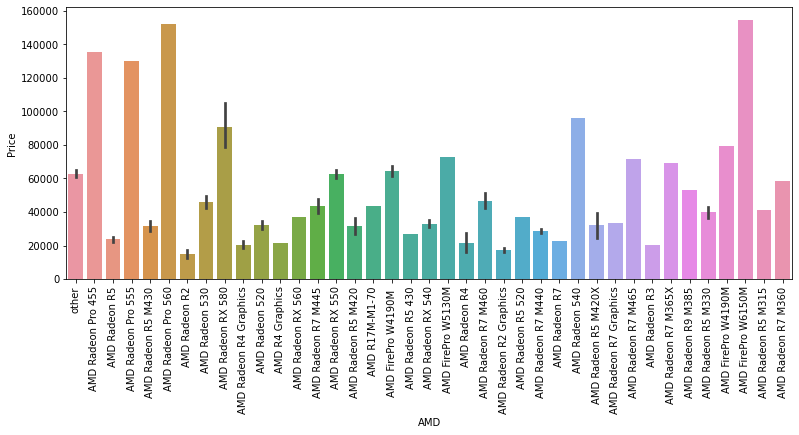

In [1057]:
ax,fig=plt.rcParams["figure.figsize"] = (13,5)
sns.barplot(x=dump.AMD, y=dump.Price)
plt.xticks(rotation="vertical")
plt.show

In [1058]:
dump["Nvidia"] = dump["Gpu"].apply(lambda x: x if "Nvidia" in x else "other")
dump["Nvidia"]


0       other
1       other
2       other
3       other
4       other
        ...  
1298    other
1299    other
1300    other
1301    other
1302    other
Name: Nvidia, Length: 1303, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

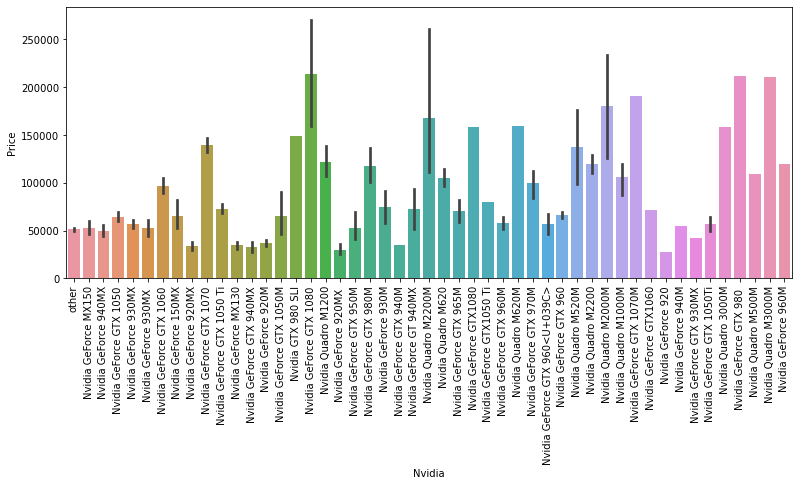

In [1059]:
ax, fig = plt.rcParams["figure.figsize"] = (13, 5)
sns.barplot(x=dump.Nvidia, y=dump.Price)
plt.xticks(rotation="vertical")
plt.show


In [1060]:
dump["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [1061]:
""" def Gpu_seperator(x):
    if "Nvidia" in x:
        if "Quadro" in x:
            return "Nvidia Quadro"
        elif "GTX" in x:
            return "Nvidia GTX"
        elif "GeForce" in x:
            return "Nvidia GeForce"
        else:
            return "Nvidia Others"
    if "AMD" in x:
        if "Radeon" in x:
            return "AMD Radeon"
        elif "FirePro" in x:
            return "AMD FirePro"
        else:
            return "AMD Other"
    if "Intel" in x:
        if "UHD" in x:
            return "Intel UHD"
        elif "Iris" in x:
            return "Intel Iris"
        elif "HD" in x:
            return "Intel HD"
        else:
            return "Intel Others" """

def Gpu_seperator(x):
    if "Nvidia" in x:
            return "Nvidia"
    if "AMD" in x:
            return "AMD"
    if "Intel" in x:
            return "Intel"

In [1062]:
dump["Gpu"]=dump["Gpu"].apply(lambda x: Gpu_seperator(x))

In [1063]:
dump

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,...,4K Ultra HD,Retina Display,ppi,SSD,HDD,Flash,Hybrid,CPU Brand,AMD,Nvidia
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,71378.6832,0,1,0,...,0,1,226.983005,128.0,0.0,0.0,0.0,Intel Core i5,other,other
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,47895.5232,0,0,0,...,0,0,127.677940,0.0,0.0,128.0,0.0,Intel Core i5,other,other
2,HP,Notebook,8,Intel,Linux/Android/others,1.86,30636.0000,0,0,1,...,0,0,141.211998,256.0,0.0,0.0,0.0,Intel Core i5,other,other
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,135195.3360,0,1,0,...,0,1,220.534624,512.0,0.0,0.0,0.0,Intel Core i7,AMD Radeon Pro 455,other
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,96095.8080,0,1,0,...,0,1,226.983005,256.0,0.0,0.0,0.0,Intel Core i5,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,33992.6400,1,1,1,...,0,0,157.350512,128.0,0.0,0.0,0.0,Intel Core i7,other,other
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,79866.7200,1,1,0,...,0,0,276.053530,512.0,0.0,0.0,0.0,Intel Core i7,other,other
1300,Lenovo,Notebook,2,Intel,Windows,1.50,12201.1200,0,0,0,...,0,0,111.935204,0.0,0.0,64.0,0.0,Intel Celeron,other,other
1301,HP,Notebook,6,AMD,Windows,2.19,40705.9200,0,0,0,...,0,0,100.454670,0.0,1024.0,0.0,0.0,Intel Core i7,AMD Radeon R5 M330,other


In [1064]:
dump.to_csv("updated.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

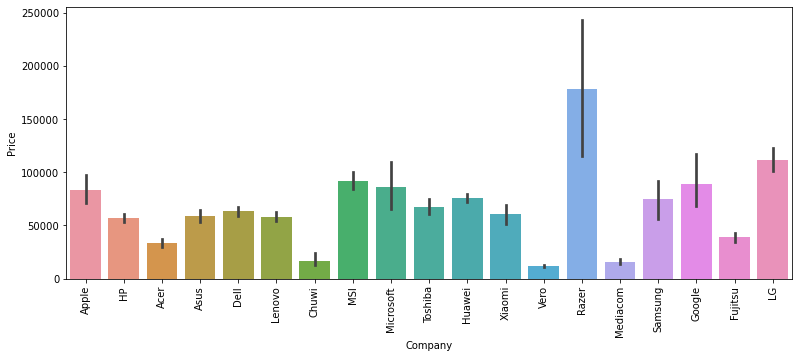

In [1065]:
sns.barplot(x=dump["Company"],y=dump["Price"])
plt.xticks(rotation = "vertical")
plt.show

In [1066]:
dump.corr()["Price"]

Ram               0.743007
Weight            0.210370
Price             1.000000
Touchscreen       0.191226
IPS               0.252208
Full HD           0.198612
Quad HD+          0.106643
4K Ultra HD       0.343982
Retina Display    0.087895
ppi               0.473487
SSD               0.670682
HDD              -0.094856
Flash            -0.040511
Hybrid            0.008011
Name: Price, dtype: float64

In [1067]:
dump.drop(columns=["Hybrid","Flash","Retina Display"],inplace=True)

In [1068]:
dump[dump["Gpu"].isnull()]
dump["Gpu"].fillna("Intel", inplace=True)

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

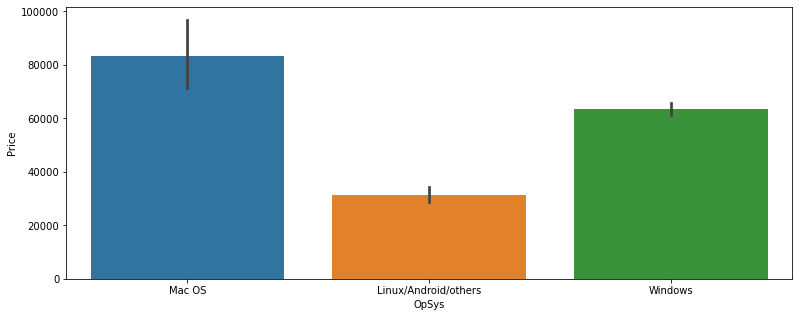

In [1069]:
sns.barplot(x=dump.OpSys,y=dump["Price"])

<function matplotlib.pyplot.show(close=None, block=None)>

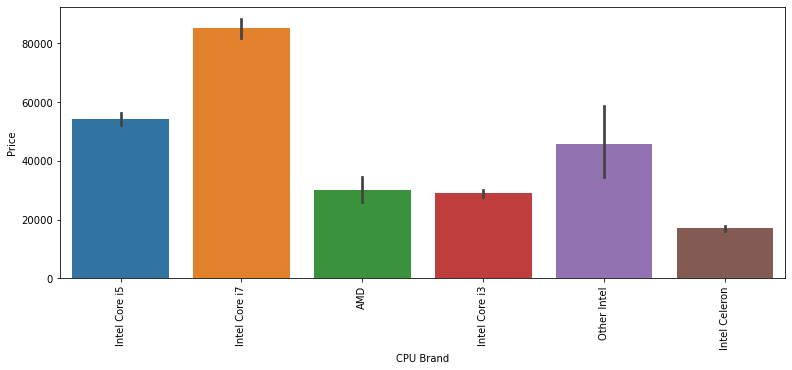

In [1070]:
sns.barplot(x=dump["CPU Brand"],y=dump["Price"])
plt.xticks(rotation="vertical")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

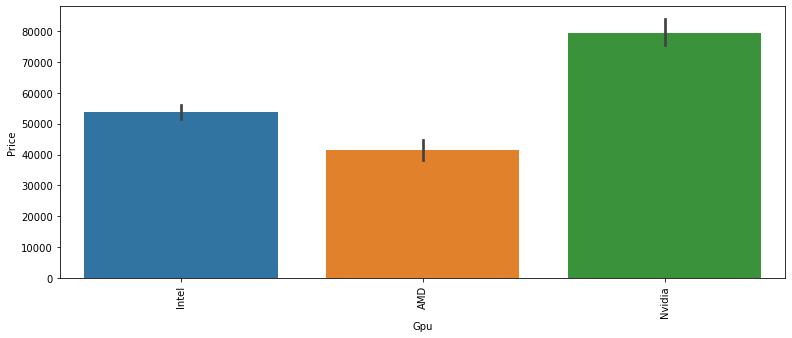

In [1071]:
sns.barplot(x=dump["Gpu"],y=dump["Price"])
plt.xticks(rotation="vertical")
plt.show

In [1072]:
dump["Gpu"].value_counts()

Intel     723
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [1073]:
X = dump.drop(columns="Price")
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand,AMD,Nvidia
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,0,0,0,226.983005,128.0,0.0,Intel Core i5,other,other
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,0,0,0,0,0,127.677940,0.0,0.0,Intel Core i5,other,other
2,HP,Notebook,8,Intel,Linux/Android/others,1.86,0,0,1,0,0,141.211998,256.0,0.0,Intel Core i5,other,other
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,0,1,0,0,0,220.534624,512.0,0.0,Intel Core i7,AMD Radeon Pro 455,other
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,0,0,0,226.983005,256.0,0.0,Intel Core i5,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,1,1,1,0,0,157.350512,128.0,0.0,Intel Core i7,other,other
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,1,1,0,1,0,276.053530,512.0,0.0,Intel Core i7,other,other
1300,Lenovo,Notebook,2,Intel,Windows,1.50,0,0,0,0,0,111.935204,0.0,0.0,Intel Celeron,other,other
1301,HP,Notebook,6,AMD,Windows,2.19,0,0,0,0,0,100.454670,0.0,1024.0,Intel Core i7,AMD Radeon R5 M330,other


<AxesSubplot:>

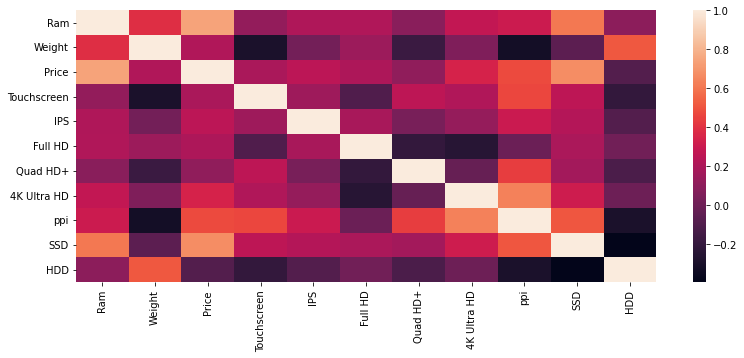

In [1074]:
sns.heatmap(dump.corr())

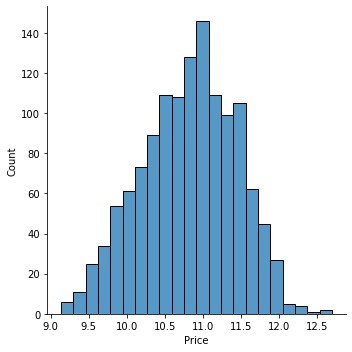

In [1075]:
sns.displot(np.log(dump["Price"]))

In [1076]:
x=dump.drop(columns=["Price"])
y=np.log(dump["Price"])

In [1077]:
x

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand,AMD,Nvidia
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,0,0,0,226.983005,128.0,0.0,Intel Core i5,other,other
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,0,0,0,0,0,127.677940,0.0,0.0,Intel Core i5,other,other
2,HP,Notebook,8,Intel,Linux/Android/others,1.86,0,0,1,0,0,141.211998,256.0,0.0,Intel Core i5,other,other
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,0,1,0,0,0,220.534624,512.0,0.0,Intel Core i7,AMD Radeon Pro 455,other
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,0,1,0,0,0,226.983005,256.0,0.0,Intel Core i5,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,1,1,1,0,0,157.350512,128.0,0.0,Intel Core i7,other,other
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,1,1,0,1,0,276.053530,512.0,0.0,Intel Core i7,other,other
1300,Lenovo,Notebook,2,Intel,Windows,1.50,0,0,0,0,0,111.935204,0.0,0.0,Intel Celeron,other,other
1301,HP,Notebook,6,AMD,Windows,2.19,0,0,0,0,0,100.454670,0.0,1024.0,Intel Core i7,AMD Radeon R5 M330,other


In [1078]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Touchscreen  1303 non-null   int64  
 7   IPS          1303 non-null   int64  
 8   Full HD      1303 non-null   int64  
 9   Quad HD+     1303 non-null   int64  
 10  4K Ultra HD  1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  SSD          1303 non-null   float64
 13  HDD          1303 non-null   float64
 14  CPU Brand    1303 non-null   object 
 15  AMD          1303 non-null   object 
 16  Nvidia       1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(5), object(7)
memory usage: 163.0+ KB


In [1079]:
x.drop(columns=["AMD","Nvidia"],inplace=True)

In [1080]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Touchscreen  1303 non-null   int64  
 7   IPS          1303 non-null   int64  
 8   Full HD      1303 non-null   int64  
 9   Quad HD+     1303 non-null   int64  
 10  4K Ultra HD  1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  SSD          1303 non-null   float64
 13  HDD          1303 non-null   float64
 14  CPU Brand    1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(5), object(5)
memory usage: 142.6+ KB


In [1081]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15, random_state=2)

In [1082]:
x_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand
183,Toshiba,Notebook,8,Intel,Windows,2.00,0,0,0,0,0,100.454670,128.0,0.0,Intel Core i5
699,HP,Notebook,4,AMD,Windows,2.10,0,1,1,0,0,141.211998,0.0,500.0,Intel Core i7
419,Lenovo,Ultrabook,8,AMD,Windows,1.75,0,1,1,0,0,157.350512,256.0,0.0,Intel Core i7
997,Acer,Notebook,4,Intel,Windows,2.40,0,0,0,0,0,100.454670,0.0,500.0,Other Intel
502,Lenovo,2 in 1 Convertible,8,Intel,Windows,1.40,1,1,1,0,0,158.482530,256.0,0.0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,Windows,2.20,0,0,0,0,0,100.454670,0.0,500.0,Intel Core i3
299,Asus,Ultrabook,16,Nvidia,Windows,1.63,0,0,1,0,0,141.211998,512.0,0.0,Intel Core i7
493,Acer,Notebook,8,AMD,Windows,2.20,0,0,0,0,0,100.454670,0.0,1024.0,AMD
527,Lenovo,Notebook,8,Nvidia,Linux/Android/others,2.20,0,0,0,0,0,100.454670,0.0,2048.0,Intel Core i3


In [1083]:
y_train

183     10.651384
699     10.510802
419     11.078373
997      9.915732
502     11.352695
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1192    10.159710
Name: Price, Length: 1107, dtype: float64

In [1084]:
x_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand
248,HP,Notebook,4,Intel,Windows,1.49,0,1,1,0,0,165.632118,0.0,500.0,Intel Core i5
556,Mediacom,Notebook,4,Intel,Windows,1.35,0,1,1,0,0,165.632118,0.0,0.0,Other Intel
693,Lenovo,2 in 1 Convertible,8,Intel,Windows,1.42,1,0,0,0,0,209.800683,256.0,0.0,Intel Core i7
387,Dell,Workstation,8,AMD,Windows,2.23,0,0,1,0,0,141.211998,0.0,500.0,Intel Core i5
781,Asus,Gaming,16,Nvidia,Windows,4.30,0,1,1,0,0,127.335675,256.0,1024.0,Intel Core i7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Asus,2 in 1 Convertible,4,Intel,Linux/Android/others,1.20,1,0,1,0,0,176.232574,0.0,0.0,Other Intel
172,Lenovo,Notebook,4,AMD,Linux/Android/others,2.20,0,0,0,0,0,100.454670,0.0,500.0,AMD
322,Asus,Notebook,8,Intel,Windows,2.00,0,0,1,0,0,157.350512,256.0,0.0,Intel Core i7
1020,Dell,2 in 1 Convertible,4,Intel,Windows,2.08,1,1,1,0,0,141.211998,0.0,1024.0,Intel Core i3


In [1085]:
y_test

248     10.490274
556      9.516825
693     11.834974
387     11.197397
781     11.737732
          ...    
697     10.481345
172      9.708902
322     10.973157
1020    10.655148
471     11.026550
Name: Price, Length: 196, dtype: float64

In [1086]:
x.Company.value_counts()


Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [1087]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [1088]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [1089]:
dump.drop(columns=["AMD", "Nvidia"])

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,71378.6832,0,1,0,0,0,226.983005,128.0,0.0,Intel Core i5
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,47895.5232,0,0,0,0,0,127.677940,0.0,0.0,Intel Core i5
2,HP,Notebook,8,Intel,Linux/Android/others,1.86,30636.0000,0,0,1,0,0,141.211998,256.0,0.0,Intel Core i5
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,135195.3360,0,1,0,0,0,220.534624,512.0,0.0,Intel Core i7
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,96095.8080,0,1,0,0,0,226.983005,256.0,0.0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,33992.6400,1,1,1,0,0,157.350512,128.0,0.0,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,79866.7200,1,1,0,1,0,276.053530,512.0,0.0,Intel Core i7
1300,Lenovo,Notebook,2,Intel,Windows,1.50,12201.1200,0,0,0,0,0,111.935204,0.0,0.0,Intel Celeron
1301,HP,Notebook,6,AMD,Windows,2.19,40705.9200,0,0,0,0,0,100.454670,0.0,1024.0,Intel Core i7


In [1090]:
x_test.to_csv("X_Test.csv")

In [1091]:
x_train

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS,Full HD,Quad HD+,4K Ultra HD,ppi,SSD,HDD,CPU Brand
183,Toshiba,Notebook,8,Intel,Windows,2.00,0,0,0,0,0,100.454670,128.0,0.0,Intel Core i5
699,HP,Notebook,4,AMD,Windows,2.10,0,1,1,0,0,141.211998,0.0,500.0,Intel Core i7
419,Lenovo,Ultrabook,8,AMD,Windows,1.75,0,1,1,0,0,157.350512,256.0,0.0,Intel Core i7
997,Acer,Notebook,4,Intel,Windows,2.40,0,0,0,0,0,100.454670,0.0,500.0,Other Intel
502,Lenovo,2 in 1 Convertible,8,Intel,Windows,1.40,1,1,1,0,0,158.482530,256.0,0.0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia,Windows,2.20,0,0,0,0,0,100.454670,0.0,500.0,Intel Core i3
299,Asus,Ultrabook,16,Nvidia,Windows,1.63,0,0,1,0,0,141.211998,512.0,0.0,Intel Core i7
493,Acer,Notebook,8,AMD,Windows,2.20,0,0,0,0,0,100.454670,0.0,1024.0,AMD
527,Lenovo,Notebook,8,Nvidia,Linux/Android/others,2.20,0,0,0,0,0,100.454670,0.0,2048.0,Intel Core i3


In [1092]:
x["Gpu"].value_counts()

Intel     723
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [1093]:
# x_train["Gpu"] = x_train["Gpu"].fillna()


In [1094]:
x["Gpu"].value_counts()

Intel     723
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

In [1095]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 183 to 1192
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1107 non-null   object 
 1   TypeName     1107 non-null   object 
 2   Ram          1107 non-null   int32  
 3   Gpu          1107 non-null   object 
 4   OpSys        1107 non-null   object 
 5   Weight       1107 non-null   float32
 6   Touchscreen  1107 non-null   int64  
 7   IPS          1107 non-null   int64  
 8   Full HD      1107 non-null   int64  
 9   Quad HD+     1107 non-null   int64  
 10  4K Ultra HD  1107 non-null   int64  
 11  ppi          1107 non-null   float64
 12  SSD          1107 non-null   float64
 13  HDD          1107 non-null   float64
 14  CPU Brand    1107 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(5), object(5)
memory usage: 129.7+ KB


In [1096]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False), [0, 1, 3, 4, 14])
],remainder='passthrough')
# print(step1.)

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8268780707612003
MAE 0.20759717874742228


In [1097]:
ohe = OneHotEncoder(categories=[0])

In [1098]:
# x_test[x_test["CPU Brand"].isna()]


In [1099]:
# print(x_test.iloc[0])
# y_pred
# ohe.fit_transform(dump.Company)
q = np.array(['Asus', 'Gaming', 8, 'Nvidia', 'Windows', 1.5, 0, 1, 1, 0, 0, 165.6321180513006,
     512.0, 0.0, 'Intel Core i5'])
q.reshape(1, -1)
np.exp(pipe.predict(q.reshape(1, -1)))


C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([76794.91744106])

## Exporting the model

In [1100]:
import pickle

# pickle.dump(dump, ope)
dump.drop(columns=["AMD", "Nvidia"], inplace=True)

In [1101]:
pickle.dump(dump, open("df.pkl", "wb"))
pickle.dump(pipe, open("pipe.pkl", "wb"))

# ME

In [1102]:
# x

In [1103]:
# X_values = x.values

In [1104]:
# X_values

In [1105]:
# ohe = OneHotEncoder(sparse=False)

In [1106]:
# # X_ohe = ohe.fit_transform(x[["Company", "TypeName", "Gpu", "OpSys", "CPU Brand"]])
# ct = ColumnTransformer([("one_hot_encoder", OneHotEncoder(), [])], remainder="passthrough")
# oh_enc_err = ct.fit_transform(X_values)


In [1107]:
# dummy_df = pd.get_dummies(x)
# dummy_df

In [1108]:
# dummy_df.keys()

In [1109]:
# oh_enc_df = pd.DataFrame(oh_enc_err, columns=['Ram', 'Weight', 'Touchscreen', 'IPS', 'Full HD', 'Quad HD+',
#                                               '4K Ultra HD', 'ppi', 'SSD', 'HDD', 'Company_Acer', 'Company_Apple',
#                                               'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
#                                               'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
#                                               'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
#                                               'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
#                                               'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
#                                               'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
#                                               'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
#                                               'Gpu_AMD FirePro', 'Gpu_AMD Other', 'Gpu_AMD Radeon', 'Gpu_Intel HD',
#                                               'Gpu_Intel Iris', 'Gpu_Intel Others', 'Gpu_Intel UHD', 'Gpu_Nvidia GTX',
#                                               'Gpu_Nvidia GeForce', 'Gpu_Nvidia Quadro', 'OpSys_Linux/Android/others',
#                                               'OpSys_Mac OS', 'OpSys_Windows', 'CPU Brand_AMD',
#                                               'CPU Brand_Intel Celeron', 'CPU Brand_Intel Core i3',
#                                               'CPU Brand_Intel Core i5', 'CPU Brand_Intel Core i7',
#                                               'CPU Brand_Other Intel'])


In [1110]:
# oh_enc_df

In [1111]:
dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   Full HD      1303 non-null   int64  
 10  Quad HD+     1303 non-null   int64  
 11  4K Ultra HD  1303 non-null   int64  
 12  ppi          1303 non-null   float64
 13  SSD          1303 non-null   float64
 14  HDD          1303 non-null   float64
 15  CPU Brand    1303 non-null   object 
dtypes: float32(1), float64(4), int32(1), int64(5), object(5)
memory usage: 152.8+ KB
